# Développement logiciel
#     Travaux Patriques Python  
###                                                               Mathilde Cadon & Arielle Gantelet


Avant toutes choses, nous devons importer le fichier $utils.py$ qui contient toutes nos fonctions ainsi que les bibliothèques utiles à leurs appels.

In [20]:
run ./utils.py

## Implémentation sans numpy


### Question 4 :
 Appliquons la fonction calcul_nb_voisins(Z) à la liste (de liste) Z, et expliquons ce qu'on obtient
sur cette sortie. Rappelons que cette fonction, et toutes les fonctions définies dans la
suite seront placées dans le fichier $utils.py$ que l'on vient d'appeller. 

In [21]:
Z = [[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

Z

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Cette matrice représente une "carte" de cellule qui comporte des cellules mortes (codées par un 0) sur ses frontières,
puis des cellules vivantes (codées par un 1) ou morte à l'intérieur.

In [22]:
calcul_nb_voisins(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

La fonction "calcul_nb_voisins" permet de prendre en argument un état du jeu de la vie. 
Cette fonction calcule ensuite, pour chaque cellule n'étant pas aux frontières, le nombre de cellules vivantes qui sont dans son entourage (les 8 cases autour d'elle). 
Elle renvoie donc une liste de liste contenant, non plus des 0 ou des 1 pour dire que la cellule est morte ou vivante, mais le nombre de cellules qui sont présentes autour d'elle. Cette "carte" conservera donc sa frontière de 0 car les calculs se font sur les cellules n'étant pas sur la frontière.


Passons maintenant à la fonction "itération_jeu".

In [23]:
help(iteration_jeu)

Help on function iteration_jeu in module __main__:

iteration_jeu(Z)
    Fonction qui prend en argument l'état initial du jeu de la vie (sous forme de liste de liste).
    Fonction qui retourne l'état du jeu après 1 itération.
    
    La fonction fait appel à la fonction qui calcule le nombre de voisins puis modifie
    les cellules, qui sont représentées par des 0 ou des 1 dans la matrice Z,
    en appliquant la règle de décision expliquée dans l'énoncée.
    
    - Si la cellule est vivante et qu'elle a moins de 2 voisins ou plus de 3 voisins, alors elle meurt.
    - Si la cellule est morte et qu'elle à 3 voisins alors elle vit.
    Dans tous les autres cas, la cellule reste dans le même état.



### Question 5 :
Dans cette question nous afficherons les étapes du jeu de 0 à 9 itérations pour la liste Z, en utilisant une boucle for. Comme demandé, nous utiliserons la fonction subplot de matplotlib pour afficher sur 2 lignes et 5 colonnes ces 10 matrices. 

De plus, on devra transformer ces listes en array pour pouvoir utiliser la fonction imshow de matplotlib.


On importe les bibliothèques necessaires.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

Nous réalisons maintenant la boucle pour afficher ces 10 états du jeu de la vie.

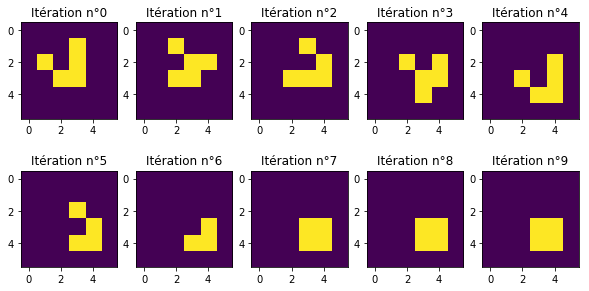

In [25]:
plt.figure(figsize=(10,5))
Zbis = np.copy(Z)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.array(Zbis))
    Zbis = iteration_jeu(Zbis)
    plt.title("Itération n°"+str(i))

Entre l'itération 0 et 4 on observe que les cellules évoluent et que l'on a un nouvel état à chaque itération.
Lors de l'étape 4 on se retrouve dans le même état que l'étape 0 mais en étant décalé de 1 vers le bas droite. 

A partir de l'itération 7, le jeu est stable et ne bougera donc plus.

##  Implémentation avec Numba

In [26]:
import time

#Attention probleme avec le jit comme c'est un languageproche de C il n'aime pas les liste de liste, il faut donc appeler
    la fonction avec np.array pour que cela fonctionne...

In [27]:
# COMPILATION INCLUSE!
start = time.time()
calcul_nb_voisins_fast(np.array(Z))
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# COMPILATION NON INCLUSE, EXECUTER DEPUIS LE CACHE
start = time.time()
calcul_nb_voisins_fast(np.array(Z))
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

# VANILLA PYTHON
start = time.time()
calcul_nb_voisins(Z)
end = time.time()
print("Elapsed (vanilla) = %s" % (end - start))

Elapsed (with compilation) = 0.620337724685669
Elapsed (after compilation) = 0.0
Elapsed (vanilla) = 0.0


In [28]:
# COMPILATION INCLUSE!
start = time.time()
iteration_jeu_fast(np.array(Z))
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# COMPILATION NON INCLUSE, EXECUTER DEPUIS LE CACHE
start = time.time()
iteration_jeu_fast(np.array(Z))
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

# VANILLA PYTHON
start = time.time()
iteration_jeu(np.array(Z))
end = time.time()
print("Elapsed (vanilla) = %s" % (end - start))

Elapsed (with compilation) = 0.39583563804626465
Elapsed (after compilation) = 0.0
Elapsed (vanilla) = 0.0


In [29]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

In [30]:
from ipywidgets import interact, fixed

interact(iteration, Z=fixed(Z_huge), nb_iter=(1, 30, 1));

interactive(children=(IntSlider(value=15, description='nb_iter', max=30, min=1), Output()), _dom_classes=('wid…

## Exercice 2

In [31]:
from sklearn.datasets import fetch_mldata
from random import randint

In [32]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target


C:\Users\Mathilde\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Mathilde\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


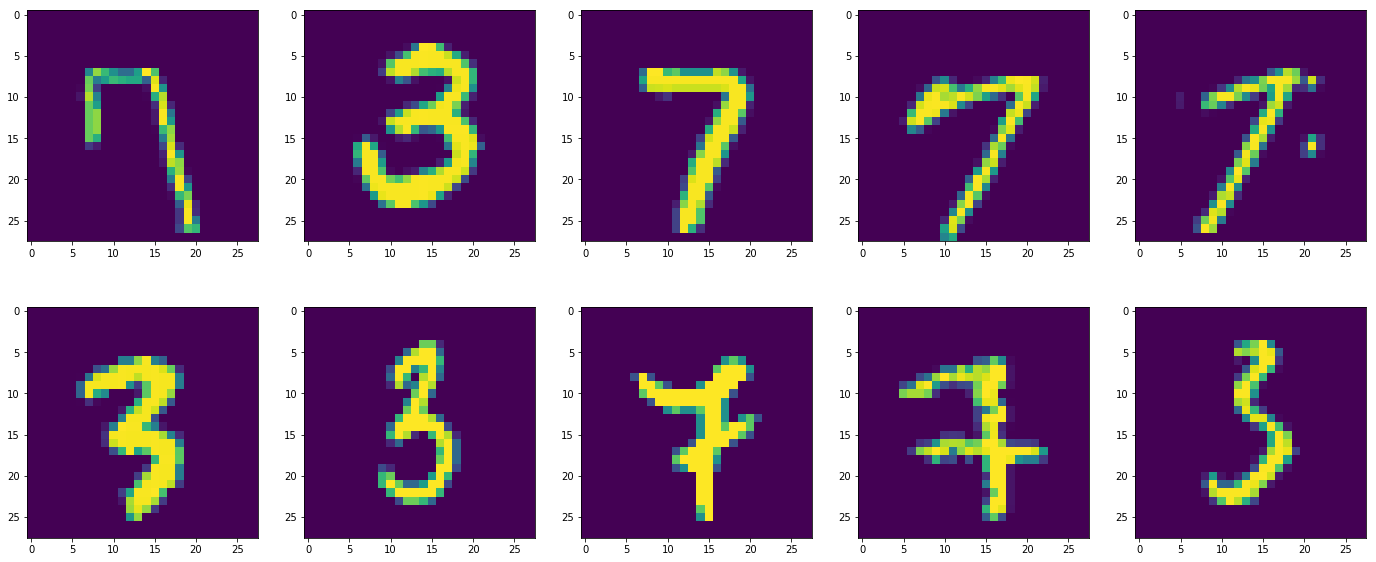

In [33]:
mask1 = np.array(y==3)
mask2 = np.array(y==7)
mask = mask1+mask2  #somme terme à terme
X37 = X[mask]
y37 = y[mask]

plt.figure(figsize=(24,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow((X37[randint(0,len(X37)-1)]).reshape(28,28))

In [34]:
np.shape(X[mask1])

(7141, 784)

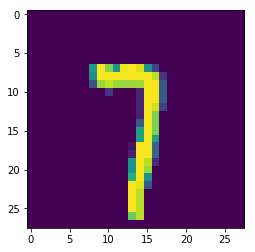

In [35]:
plt.imshow((X37[7141]).reshape(28,28))

In [36]:
from sklearn import linear_model

skl_linmod = linear_model.LogisticRegression(fit_intercept=False)

In [37]:
skl_linmod.fit(X37,y37)

C:\Users\Mathilde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
interact(fig_digit,  x=fixed(X37[8000]), w=fixed(skl_linmod.coef_.T), alpha=(0.1, 300, 0.1));

interactive(children=(FloatSlider(value=150.0, description='alpha', max=300.0, min=0.1), Output()), _dom_class…

In [39]:
import matplotlib.animation as animation

from matplotlib import rc
from IPython.display import HTML

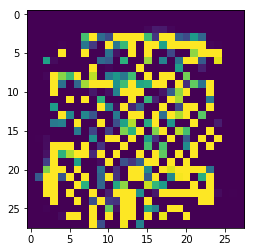

In [40]:
w= skl_linmod.coef_.T
x= X37[8000]

fig = plt.figure()

def fig_anim(x, w, i):
    return((x.reshape(784,1)-i/np.linalg.norm(w)**2 * np.dot(w.T,x) * w).reshape(28,28))
    
im = plt.imshow(fig_anim(x,w,0).reshape(28,28), animated=True)

def animate(alpha):
    xmod = fig_anim(x,w,alpha)
    im.set_array(xmod)
    return im,

anim = animation.FuncAnimation(fig, animate, frames=200, blit=True, interval= 0.1)

anim.save('animation3.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [41]:
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="animation3.mp4" type="video/mp4">
</video>
</div>
""")

Module created for script run in IPython


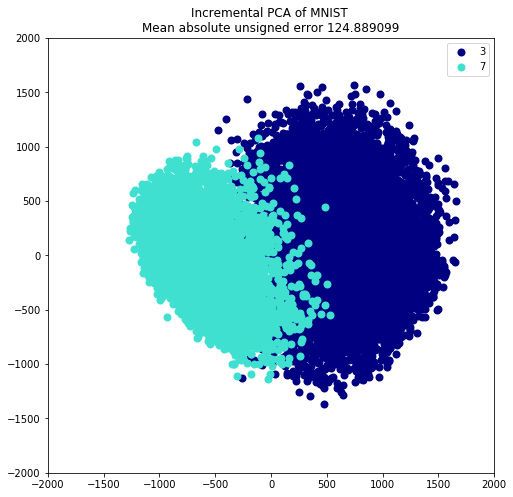

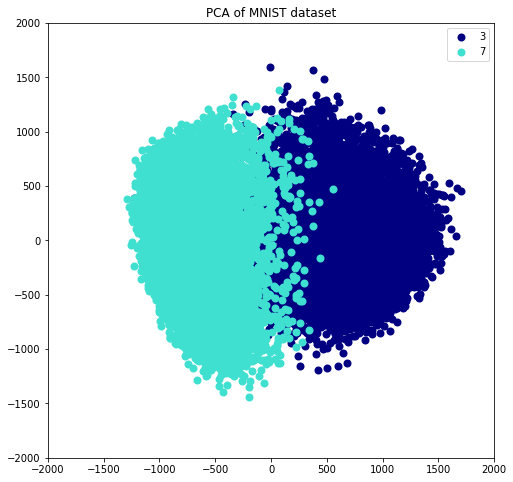

In [42]:
print(__doc__)

from sklearn.decomposition import PCA, IncrementalPCA

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X37)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X37)

colors = ['navy', 'turquoise']
label = np.array(['3', '7'], dtype='<U10')

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [3, 7], label):
        plt.scatter(X_transformed[y37 == i, 0], X_transformed[y37 == i, 1], color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of MNIST \nMean absolute unsigned error " "%.6f" % err)
    else:
        plt.title(title + " of MNIST dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-2000, 2000, -2000, 2000])

plt.show()